In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# df size
df.shape

(1000, 8)

In [5]:
# basic information of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check for any missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# unique values in attributes
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
# Frequency counts to see each col's data distribution

# df["gender"].value_counts()
# df["race/ethnicity"].value_counts()
# df["parental level of education"].value_counts()
# df["lunch"].value_counts()
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [11]:
df[["gender", "test preparation course" ]].value_counts()

gender  test preparation course
female  none                       334
male    none                       308
female  completed                  184
male    completed                  174
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_6180\3655128533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x='math score', data=df, palette='muted')


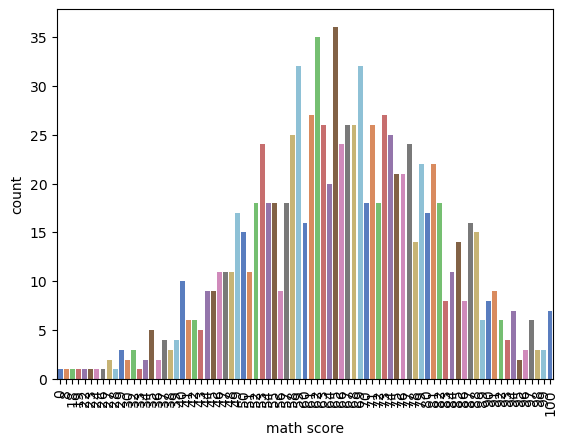

In [12]:
# explore math's score
p = sns.countplot(x='math score', data=df, palette='muted')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [13]:
# passing marks
passmarks = 40

In [14]:
# how many students passed in math's exam?
df['Math_PassStatus'] = np.where(df['math score']<passmarks, 'F', 'P')
df.Math_PassStatus.value_counts()

Math_PassStatus
P    960
F     40
Name: count, dtype: int64

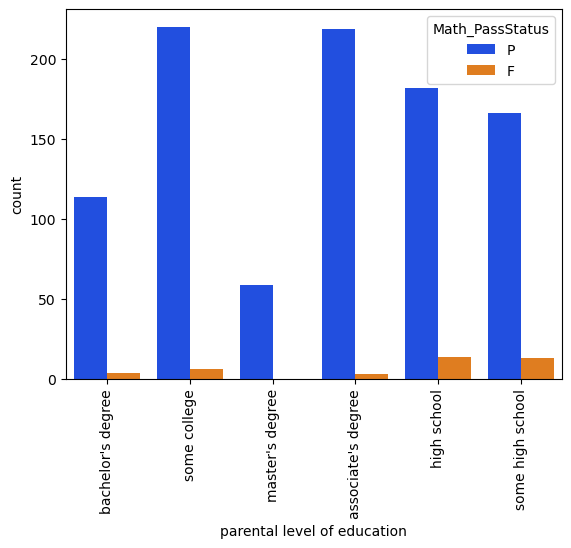

In [15]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

C:\Users\hp\AppData\Local\Temp\ipykernel_6180\3529135665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="reading score", data=df, palette="muted")


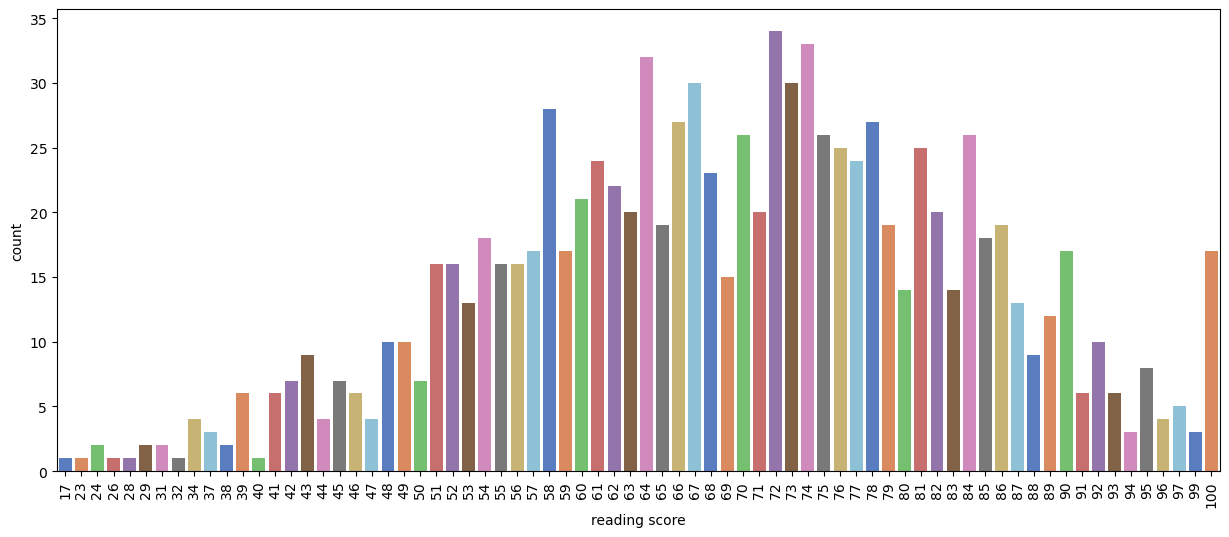

In [16]:
# explore reading score
plt.figure(figsize=(15, 6))  # Increase the width and adjust height
sns.countplot(x="reading score", data=df, palette="muted")
plt.xticks(rotation=90)  # Rotate x labels to avoid overlap
plt.show()

In [17]:
# how many students passed in reading's exam?
df['Reading_PassStatus'] = np.where(df['reading score']<passmarks, 'F', 'P')
df.Reading_PassStatus.value_counts()

Reading_PassStatus
P    974
F     26
Name: count, dtype: int64

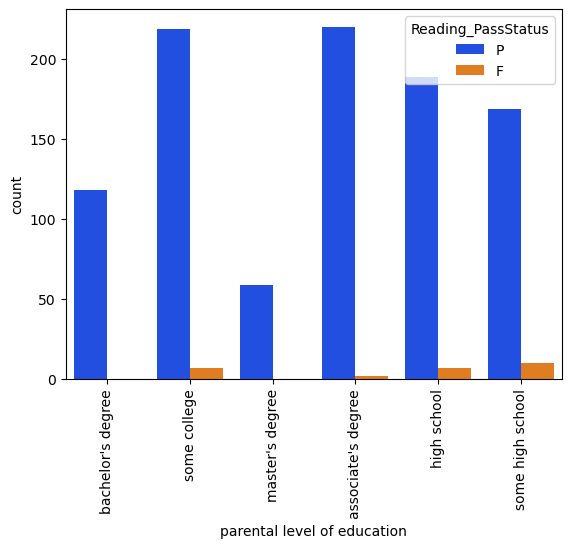

In [18]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

C:\Users\hp\AppData\Local\Temp\ipykernel_6180\1941980922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="writing score", data=df, palette="muted")


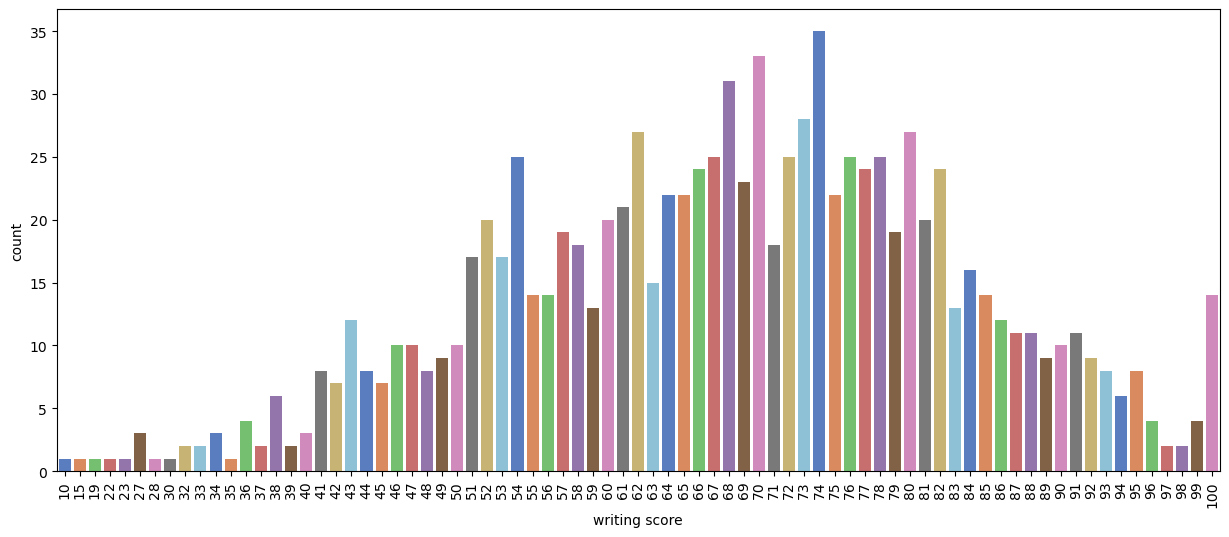

In [19]:
# explore writing score
plt.figure(figsize=(15, 6))  # Increase the width and adjust height
sns.countplot(x="writing score", data=df, palette="muted")
plt.xticks(rotation=90)  # Rotate x labels to avoid overlap
plt.show()

In [20]:
# how many students passed in reading's exam?
df['Writing_PassStatus'] = np.where(df['writing score']<passmarks, 'F', 'P')
df.Writing_PassStatus.value_counts()

Writing_PassStatus
P    968
F     32
Name: count, dtype: int64

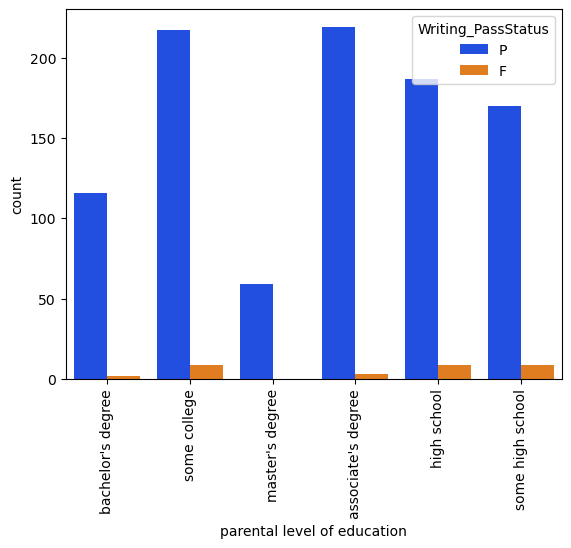

In [21]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [22]:
# How many students passed in all the subjects?
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

OverAll_PassStatus
P    949
F     51
Name: count, dtype: int64

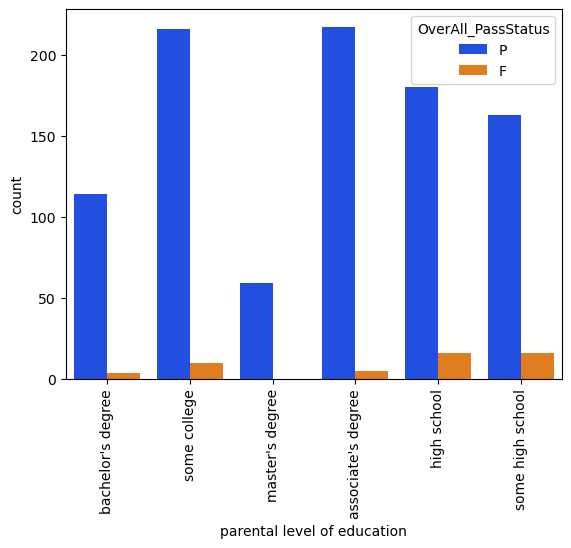

In [23]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [24]:
# find mark's percentage
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

C:\Users\hp\AppData\Local\Temp\ipykernel_6180\2174762200.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="Percentage", data = df, palette="muted")


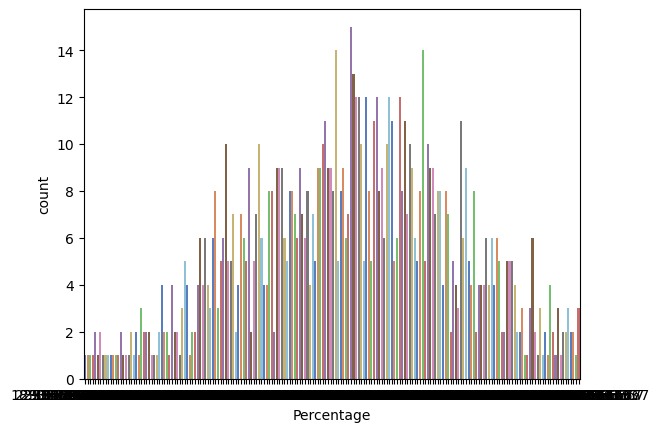

In [25]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [26]:
# Grading on mark's

def Get_grade(Percentage, OverAll_PassStatus):
    if OverAll_PassStatus == 'F':
        return 'F'
    elif Percentage >= 80:
        return 'A'
    elif Percentage >= 70:
        return 'B'
    elif Percentage >= 60:
        return 'C'
    elif Percentage >= 50:
        return 'D'
    elif Percentage >= 40:
        return 'E'
    else:
        return 'F'

df['Grade'] = df.apply(lambda x: Get_grade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

Grade
B    261
C    256
A    198
D    178
E     56
F     51
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_6180\1373173674.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Grade', order=['A','B','C','D','E','F'], palette='muted')


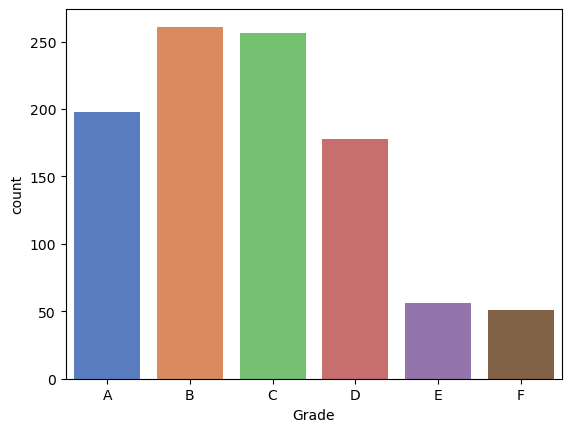

In [27]:
# plot the grades obtained in a order
sns.countplot(data=df, x='Grade', order=['A','B','C','D','E','F'], palette='muted')
plt.show()

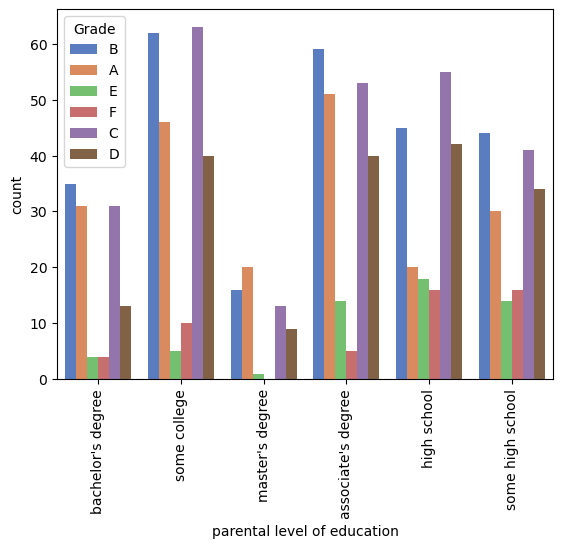

In [28]:
p = sns.countplot(data=df, x='parental level of education', hue='Grade', palette='muted')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [29]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P,282,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P,172,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P,195,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P,223,74.333333,B


In [30]:
df = df.drop(['Math_PassStatus', 'Reading_PassStatus', 'Writing_PassStatus', 'OverAll_PassStatus', 'Total_Marks', 'Grade'], axis=1)

In [31]:
# Average scores by gender
gender_performance = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()
gender_performance

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [32]:
# Average scores by race/ethni
race_performance = df.groupby("race/ethnicity")[["math score", "reading score", "writing score"]].mean()
race_performance 

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [33]:
# Average scores by parental level of education
parental_education_performance = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()
parental_education_performance 

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [34]:
# Average scores by lunch type
lunch_performance = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
lunch_performance

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [35]:
# Average scores by test preparation course
test_prep_performance = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
test_prep_performance

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


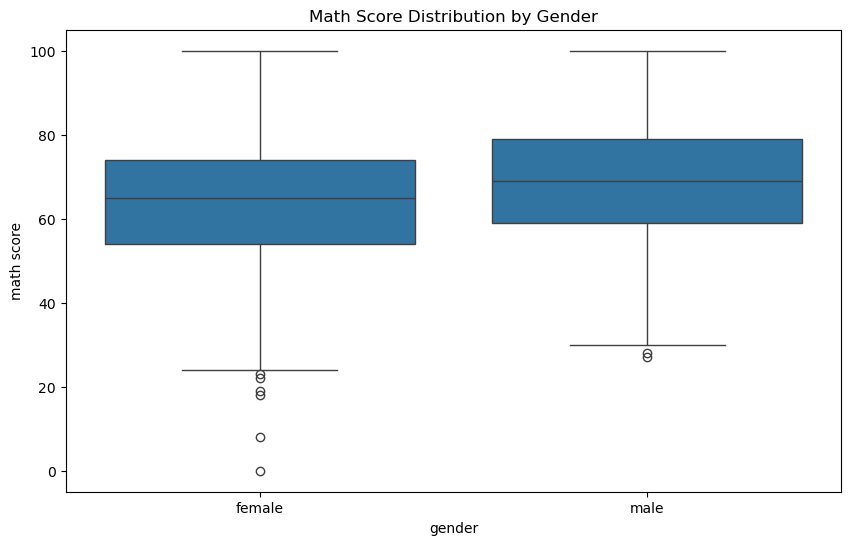

In [36]:
# show distributions of numeric data values

plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="math score", data=df)
plt.title("Math Score Distribution by Gender")
plt.show()

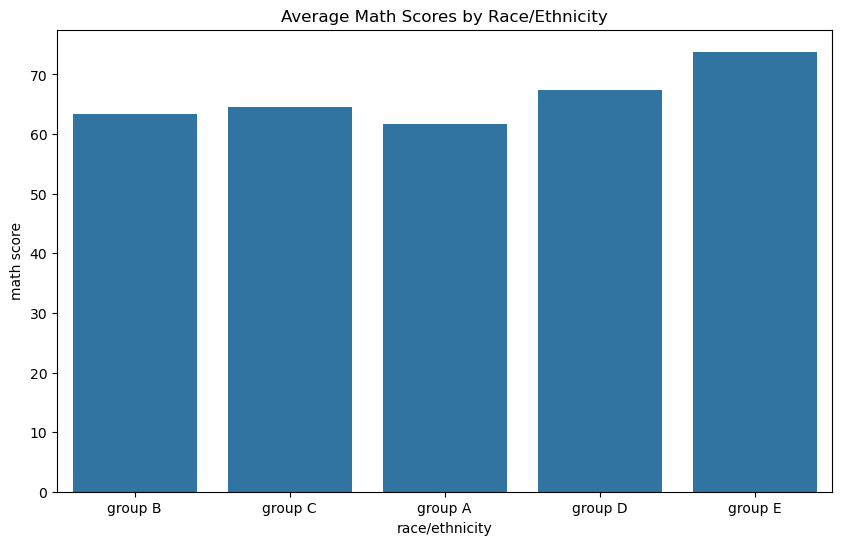

In [37]:
# relationship bw numeric and categoric variable

plt.figure(figsize=(10, 6))
sns.barplot(x="race/ethnicity", y="math score", data=df, errorbar=None)
plt.title("Average Math Scores by Race/Ethnicity")
plt.show()

In [38]:
# Correlation Analysis
correlation_matrix = df[["math score", "reading score", "writing score"]].corr()
correlation_matrix

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


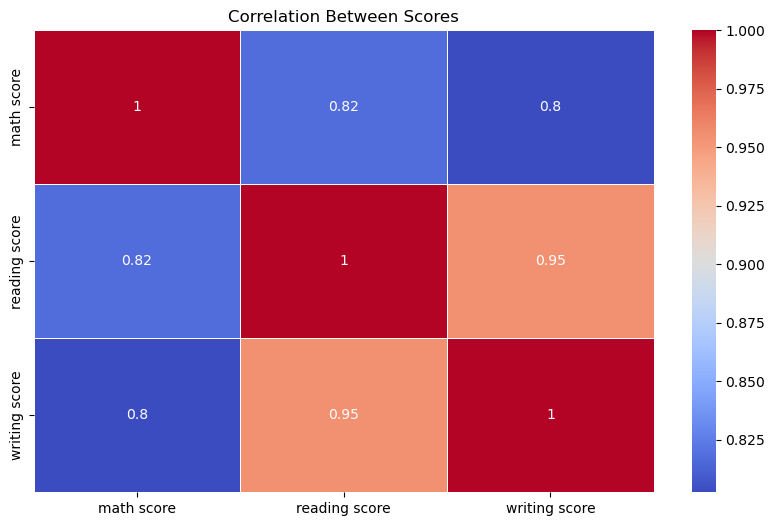

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Scores")
plt.show()

## Feature Engineering

In [40]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [41]:
df["Total score"] = df[["math score", "reading score", "writing score"]].sum(axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,282
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,172
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,195
998,female,group D,some college,standard,completed,68,78,77,74.333333,223


In [42]:
df["performance level"] = df["Total score"].apply(lambda x: 'high' if x >= 250 else ('medium' if x >= 200 else 'low'))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,Total score,performance level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218,medium
1,female,group C,some college,standard,completed,69,90,88,82.333333,247,medium
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278,high
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148,low
4,male,group C,some college,standard,none,76,78,75,76.333333,229,medium


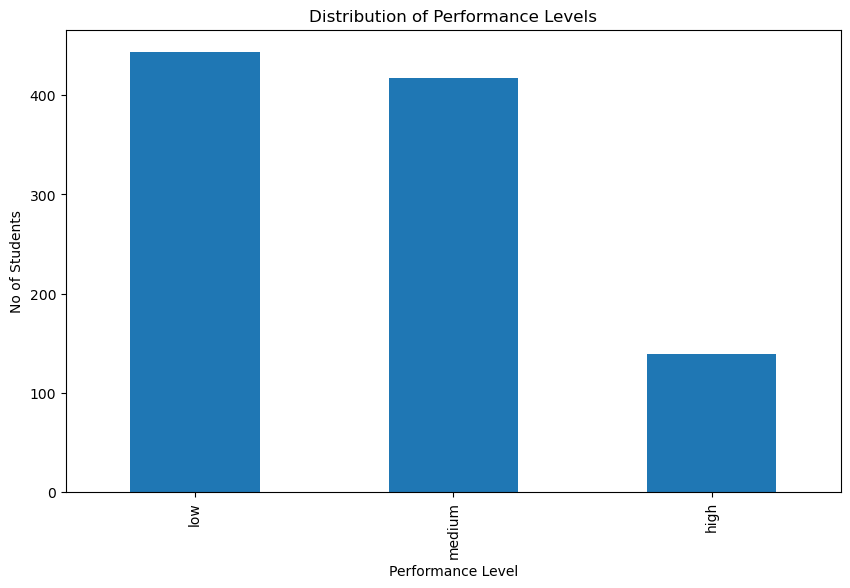

In [43]:
plt.figure(figsize=(10,6))
df['performance level'].value_counts().plot(kind='bar')
plt.title('Distribution of Performance Levels')
plt.xlabel('Performance Level')
plt.ylabel('No of Students')
plt.show()

In [44]:
# Binning Parental education levels

def education_binning(level):
    if "high school" in level:
        return "high school or less"
    else:
        return "college or more"

df["parental_education_binned"] = df["parental level of education"].apply(education_binning)

df = df.drop(['parental level of education'], axis=1)

In [45]:
df

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,Percentage,Total score,performance level,parental_education_binned
0,female,group B,standard,none,72,72,74,72.666667,218,medium,college or more
1,female,group C,standard,completed,69,90,88,82.333333,247,medium,college or more
2,female,group B,standard,none,90,95,93,92.666667,278,high,college or more
3,male,group A,free/reduced,none,47,57,44,49.333333,148,low,college or more
4,male,group C,standard,none,76,78,75,76.333333,229,medium,college or more
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95,94.000000,282,high,college or more
996,male,group C,free/reduced,none,62,55,55,57.333333,172,low,high school or less
997,female,group C,free/reduced,completed,59,71,65,65.000000,195,low,high school or less
998,female,group D,standard,completed,68,78,77,74.333333,223,medium,college or more


In [46]:
df["parental_education_binned"].value_counts()

parental_education_binned
college or more        625
high school or less    375
Name: count, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
# LabelEncoder for binary categorical features
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])

In [49]:
df['gender_encoded'].unique()

array([0, 1])

In [50]:
print(le.inverse_transform([0, 1, 1, 0]))

['female' 'male' 'male' 'female']


In [51]:
# Label encode lunch (0 for free/reduced, 1 for standard)
df['lunch_encoded'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})

df['test_prep_course_encoded'] = df['test preparation course'].map({'none': 0, 'completed': 1})

df['parental_education_binned_encoded'] = df['parental_education_binned'].map({'college or more': 1, 'high school or less': 0})

df = df.drop(["gender", "lunch", "test preparation course", "parental_education_binned"], axis=1)

In [52]:
df

,race/ethnicity,math score,reading score,writing score,Percentage,Total score,performance level,gender_encoded,lunch_encoded,test_prep_course_encoded,parental_education_binned_encoded
0,group B,72,72,74,72.666667,218,medium,0,1,0,1
1,group C,69,90,88,82.333333,247,medium,0,1,1,1
2,group B,90,95,93,92.666667,278,high,0,1,0,1
3,group A,47,57,44,49.333333,148,low,1,0,0,1
4,group C,76,78,75,76.333333,229,medium,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,group E,88,99,95,94.000000,282,high,0,1,1,1
996,group C,62,55,55,57.333333,172,low,1,0,0,0
997,group C,59,71,65,65.000000,195,low,0,0,1,0
998,group D,68,78,77,74.333333,223,medium,0,1,1,1


In [53]:
# OneHotEncoder for non-binary categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the 'group' column
encoded_features = encoder.fit_transform(df[['race/ethnicity']])

# Get feature names
feature_names = encoder.get_feature_names_out(['race/ethnicity'])
print(feature_names)

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)
# print(encoded_df)

# Concatenate the original DataFrame with the one-hot-encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'group' column if no longer needed
df.drop(columns=['race/ethnicity'], inplace=True)

['race/ethnicity_group B' 'race/ethnicity_group C'
 'race/ethnicity_group D' 'race/ethnicity_group E']


In [54]:
df

,math score,reading score,writing score,Percentage,Total score,performance level,gender_encoded,lunch_encoded,test_prep_course_encoded,parental_education_binned_encoded,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,72.666667,218,medium,0,1,0,1,1.0,0.0,0.0,0.0
1,69,90,88,82.333333,247,medium,0,1,1,1,0.0,1.0,0.0,0.0
2,90,95,93,92.666667,278,high,0,1,0,1,1.0,0.0,0.0,0.0
3,47,57,44,49.333333,148,low,1,0,0,1,0.0,0.0,0.0,0.0
4,76,78,75,76.333333,229,medium,1,1,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,94.000000,282,high,0,1,1,1,0.0,0.0,0.0,1.0
996,62,55,55,57.333333,172,low,1,0,0,0,0.0,1.0,0.0,0.0
997,59,71,65,65.000000,195,low,0,0,1,0,0.0,1.0,0.0,0.0
998,68,78,77,74.333333,223,medium,0,1,1,1,0.0,0.0,1.0,0.0


In [55]:
df.nunique()

math score                            81
reading score                         72
writing score                         77
Percentage                           194
Total score                          194
performance level                      3
gender_encoded                         2
lunch_encoded                          2
test_prep_course_encoded               2
parental_education_binned_encoded      2
race/ethnicity_group B                 2
race/ethnicity_group C                 2
race/ethnicity_group D                 2
race/ethnicity_group E                 2
dtype: int64

In [56]:
# Using logistic Regression Algo

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [57]:
# Ordinal Encoder --> categorical variable with a potential ordinal relationship (low < medium < high)
ordinal_encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])

df['performance_level_encoded'] = ordinal_encoder.fit_transform(df[['performance level']])
df = df.drop(['performance level'], axis=1)

In [58]:
df.head()

,math score,reading score,writing score,Percentage,Total score,gender_encoded,lunch_encoded,test_prep_course_encoded,parental_education_binned_encoded,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,performance_level_encoded
0,72,72,74,72.666667,218,0,1,0,1,1.0,0.0,0.0,0.0,1.0
1,69,90,88,82.333333,247,0,1,1,1,0.0,1.0,0.0,0.0,1.0
2,90,95,93,92.666667,278,0,1,0,1,1.0,0.0,0.0,0.0,2.0
3,47,57,44,49.333333,148,1,0,0,1,0.0,0.0,0.0,0.0,0.0
4,76,78,75,76.333333,229,1,1,0,1,0.0,1.0,0.0,0.0,1.0


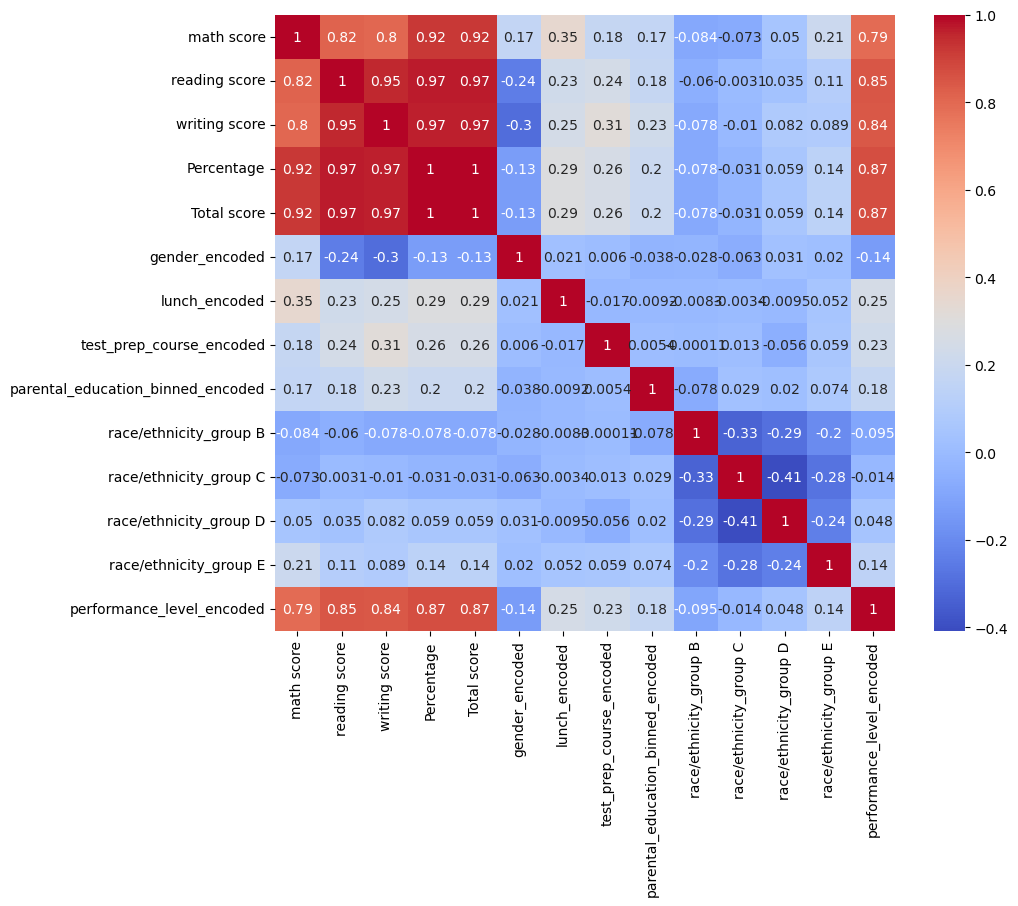

In [59]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [60]:
X = df.drop(['performance_level_encoded'], axis=1)
y = df['performance_level_encoded']

In [61]:
from sklearn.feature_selection import SelectKBest, chi2

k = 5
chi2_selector = SelectKBest(chi2, k=k)
X_new = chi2_selector.fit_transform(X, y)

selected_features_indices = chi2_selector.get_support(indices=True)

selected_features = X.columns[selected_features_indices]
print(selected_features)

Index(['math score', 'reading score', 'writing score', 'Percentage',
       'Total score'],
      dtype='object')


In [62]:
X1 = df[['math score', 'reading score', 'writing score', 'Total score', 'test_prep_course_encoded']]
y1 = df['performance_level_encoded']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

lr = LogisticRegression()

In [63]:
lr.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred = lr.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred)

0.885

In [66]:
# classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.96      0.98        94\n         1.0       0.78      0.99      0.87        80\n         2.0       0.89      0.31      0.46        26\n\n    accuracy                           0.89       200\n   macro avg       0.89      0.75      0.77       200\nweighted avg       0.90      0.89      0.87       200\n'

In [67]:
# using random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10)

In [68]:
y_pred = rf.predict(X_test)

In [69]:
accuracy_score(y_pred, y_test)

1.0

In [70]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00        93\n         1.0       1.00      1.00      1.00        86\n         2.0       1.00      1.00      1.00        21\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n'

Text(0.5, 1.0, 'Confusion Matrix')

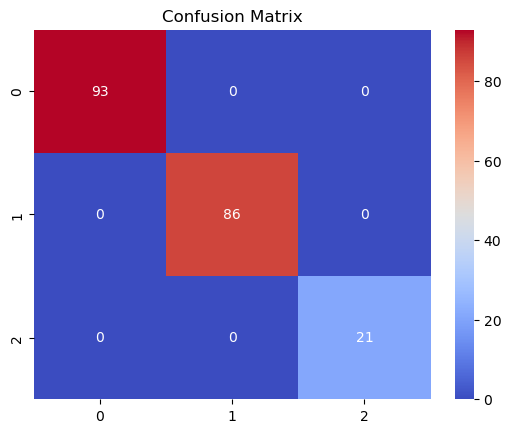

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Feature Importance')

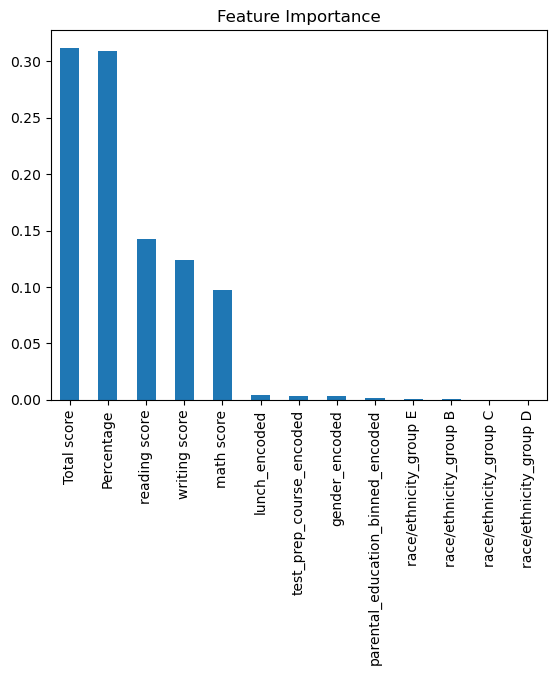

In [72]:
# Feature importance from Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")

In [73]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print(f'Cross Validation score: {cv_scores}')
print(f'Average CV score: {cv_scores.mean()}')

Cross Validation score: [1. 1. 1. 1. 1.]
Average CV score: 1.0


In [74]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(rf, X_train, y_train, cv=skf)
print(scores.mean())

1.0


In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [76]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
y_pred = dt.predict(X_test)

scores = accuracy_score(y_pred, y_test)
scores

1.0